In [1]:
import pandas as pd

In [19]:
df = pd.read_csv("HouseData.csv")
df.shape

(25155, 38)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                25155 non-null  int64 
 1   district                  25155 non-null  object
 2   price                     25155 non-null  object
 3   address                   25155 non-null  object
 4   AdUpdateDate              25155 non-null  object
 5   Category                  25155 non-null  object
 6   GrossSquareMeters         25155 non-null  object
 7   BuildingAge               25155 non-null  object
 8   NumberFloorsofBuilding    25155 non-null  int64 
 9   UsingStatus               25155 non-null  object
 10  EligibilityForInvestment  21506 non-null  object
 11  BuildStatus               11231 non-null  object
 12  TitleStatus               9712 non-null   object
 13  ItemStatus                18332 non-null  object
 14  NumberOfBathrooms     

In [21]:
df['price'].head()

0     3,100,000TL
1     1,600,000TL
2    18,500,000TL
3     9,500,000TL
4    25,000,000TL
Name: price, dtype: object

In [43]:
df['price'] = df['price'].astype(str).str.replace(',','')
df['price'] = df['price'].astype(str).str.replace('TL','')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25155 entries, 0 to 25154
Series name: price
Non-Null Count  Dtype  
--------------  -----  
23822 non-null  float64
dtypes: float64(1)
memory usage: 196.7 KB


In [57]:
print(f"Boşalan veri sayısı: {df['price'].isnull().sum()}")

Boşalan veri sayısı: 1333


In [59]:
df.dropna(subset=['price'], inplace = True)

In [63]:
df.shape

(23822, 38)

In [67]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

df['price'].describe()

count         23822
mean        5052525
std       108469346
min           20000
25%          788000
50%         1350000
75%         2900000
max     16000000000
Name: price, dtype: float64

Analiz Tavanı: 12000000.0TL olarak alınmıştır.


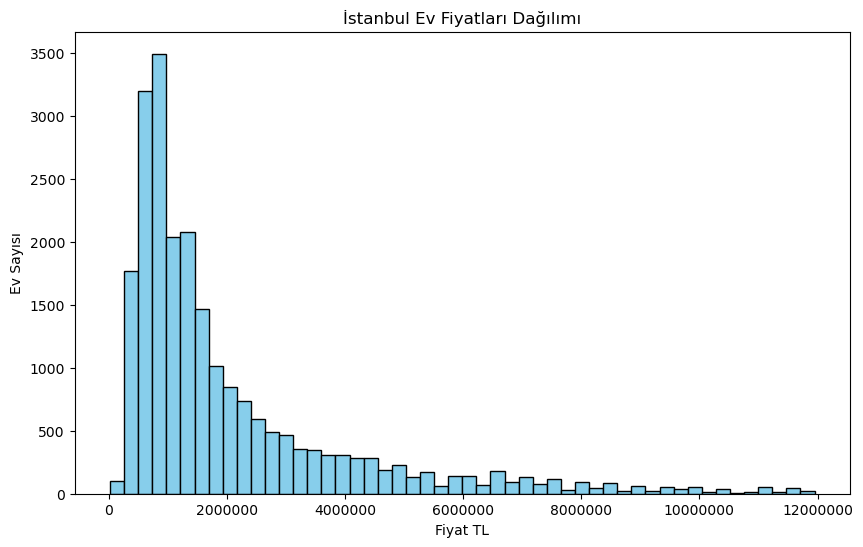

In [121]:
ust_sinir = df['price'].quantile(0.95)
print(f'Analiz Tavanı: {ust_sinir}TL olarak alınmıştır.')
df_temiz = df[df['price']<ust_sinir]


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(df_temiz['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('İstanbul Ev Fiyatları Dağılımı')
plt.xlabel('Fiyat TL')
plt.ylabel('Ev Sayısı')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

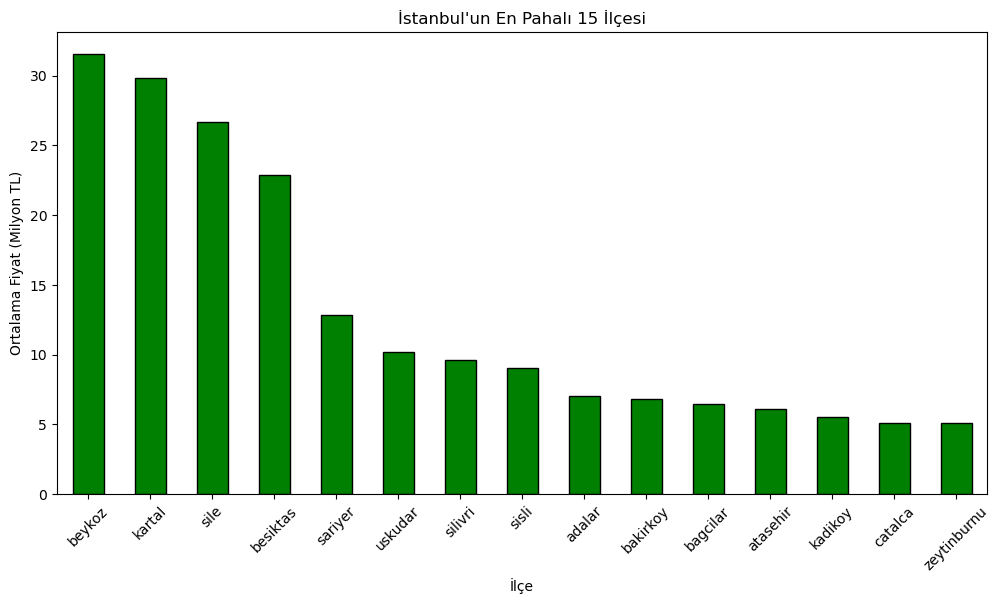

In [169]:
df_new = df.groupby('district')['price'].mean().sort_values(ascending = False).head(15)
df_new = df_new / 1000000
plt.figure(figsize=(12, 6))
df_new.plot(kind='bar', color='green', edgecolor='black')
plt.title("İstanbul'un En Pahalı 15 İlçesi")
plt.xlabel("İlçe")
plt.ylabel("Ortalama Fiyat (Milyon TL)")
plt.xticks(rotation=45)
plt.savefig('istanbul_house_prices.png', dpi=300, bbox_inches='tight')
plt.show()